### Livability and Affordability Index

In [ ]:
# import libraries#
import numpy as np
import re
import json
import math
from numpy import nan
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Read Prediction data#
property_data_2023_2025 = pd.read_csv('../data/raw/2023_2025_house_data_final.csv')



In [38]:
# Only choose Year 2023 to do the index(for the future)#
data_2023 = property_data_2023_2025[property_data_2023_2025['year'] == 2023]

# we think the school distance, station distance, population, postcode and income are #
# features which related to livability and affordability#
data_2023_index = data_2023[['real_school_distance','real_station_distance','Population','postcode','Income']]
data_2023_index

,real_school_distance,real_station_distance,Population,postcode,Income
0,0.7,0.5,47744.200000,3000,129324.000000
1,0.9,1.5,47744.200000,3000,129324.000000
2,2.0,1.6,47744.200000,3000,129324.000000
3,0.8,1.4,47744.200000,3000,129324.000000
4,0.7,0.5,47744.200000,3000,129324.000000
...,...,...,...,...,...
10653,3.5,118.3,26604.859564,3996,49626.133333
10654,1.0,118.8,26604.859564,3996,49626.133333
10655,0.5,118.4,26604.859564,3996,49626.133333
10656,0.1,118.0,26604.859564,3996,49626.133333


In [39]:
# The index is the data we got from future selection#
# which is the relavance between weekly rent and features#
index = np.array([0.1557,0.1017,0.1261,0.0958,0.0525]).reshape(-1,1)

# caculate the weighted index for each region#
livability_rate = []
for i in range(0, len(data_2023_index)):
    y = np.array(data_2023_index.iloc[i].tolist()).reshape(-1,1)
    rate = sum(index*y)
    livability_rate.append(rate)
    
lst = []
for i in range(0, len(data_2023_index)):
    lst.append(livability_rate[i][0]) 

# Append the livability rate into dataframe#
data_2023['livability_rate'] = lst
data_2023

/var/folders/bt/_4flgftn2md9y_nd9bwjh18r0000gn/T/ipykernel_84410/3910797865.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['livability_rate'] = lst


,Unnamed: 0,name,property_type,year,coordinates,postcode,sa2_coor,closest_sa2,bed,bath,car,Income,Population,real_school_distance,real_school_duration,real_station_distance,real_station_duration,week_rent,Hospital num,livability_rate
0,0,101/25-33 Wills Street Melbourne VIC 3000,Apartment / Unit / Flat,2023,"[-37.8107757, 144.9569269]",3000,[xcoord 144.962765\nycoord -37.813377\nN...,Melbourne,1.0,1.0,NaN,129324.000000,47744.200000,0.7,1.7,0.5,1.2,400.0,4.0,13097.613460
1,1,2905B/11 Rose Lane Melbourne VIC 3000,Apartment / Unit / Flat,2023,"[-37.815446, 144.9541165]",3000,[xcoord 144.962765\nycoord -37.813377\nN...,Melbourne,2.0,1.0,1.0,129324.000000,47744.200000,0.9,2.3,1.5,3.0,575.0,4.0,13097.746300
2,2,1901/368 St Kilda Road Melbourne VIC 3000,Apartment / Unit / Flat,2023,"[-37.8318086, 144.9710272]",3000,[xcoord 144.962765\nycoord -37.813377\nN...,Melbourne,3.0,2.0,2.0,129324.000000,47744.200000,2.0,3.6,1.6,2.4,1800.0,4.0,13097.927740
3,3,1211/200 Spencer Street Melbourne VIC 3000,Apartment / Unit / Flat,2023,"[-37.816228, 144.9532465]",3000,[xcoord 144.962765\nycoord -37.813377\nN...,Melbourne,1.0,1.0,1.0,129324.000000,47744.200000,0.8,1.8,1.4,2.4,480.0,4.0,13097.720560
4,4,1008/380 Little Lonsdale Street Melbourne VIC ...,Apartment / Unit / Flat,2023,"[-37.8121026, 144.9581291]",3000,[xcoord 144.962765\nycoord -37.813377\nN...,Melbourne,1.0,1.0,NaN,129324.000000,47744.200000,0.7,1.8,0.5,1.3,400.0,4.0,13097.613460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10653,10653,28 Beachcomber Drive Inverloch VIC 3996,House,2023,"[-38.6412502, 145.7031282]",3996,[xcoord 146.102345\nycoord -38.694093\nN...,Wonthaggi - Inverloch,4.0,2.0,NaN,49626.133333,26604.859564,3.5,5.0,118.3,96.5,550.0,0.0,6355.637651
10654,10654,14 Inverloch Parade Inverloch VIC 3996,House,2023,"[-38.6287143, 145.7358082]",3996,[xcoord 146.102345\nycoord -38.694093\nN...,Wonthaggi - Inverloch,2.0,1.0,NaN,49626.133333,26604.859564,1.0,2.2,118.8,97.0,420.0,0.0,6355.299251
10655,10655,10 Hopetoun Street Inverloch VIC 3996,House,2023,"[-38.6341243, 145.7306862]",3996,[xcoord 146.102345\nycoord -38.694093\nN...,Wonthaggi - Inverloch,2.0,1.0,1.0,49626.133333,26604.859564,0.5,1.3,118.4,97.0,370.0,0.0,6355.180721
10656,10656,Inverloch VIC 3996,House,2023,"[-38.6314613, 145.7293638]",3996,[xcoord 146.102345\nycoord -38.694093\nN...,Wonthaggi - Inverloch,3.0,2.0,1.0,49626.133333,26604.859564,0.1,0.2,118.0,95.8,475.0,0.0,6355.077761


In [53]:
# calculate the mean index for each SA2 region#
sa2_rate =data_2023['livability_rate'].groupby(data_2023['closest_sa2']).mean()
sa2_rate = sa2_rate.to_frame()
sa2_rate = sa2_rate.sort_values('livability_rate',ascending=False)

# Got to 5 region with highest index#
sa2_rate_top = sa2_rate.head()
sa2_rate_top = sa2_rate_top.rename(columns={'livability_rate':'livability_index'})
sa2_rate_top

,livability_index
closest_sa2,
Melbourne,13097.657284
Toorak,12783.257215
Brighton (Vic.),11634.569804
Malvern - Glen Iris,10420.380785
Surrey Hills (West) - Canterbury,9840.395766


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Toorak'),
  Text(2, 0, 'Brighton (Vic.)'),
  Text(3, 0, 'Malvern - Glen Iris'),
  Text(4, 0, 'Surrey Hills (West) - Canterbury')])

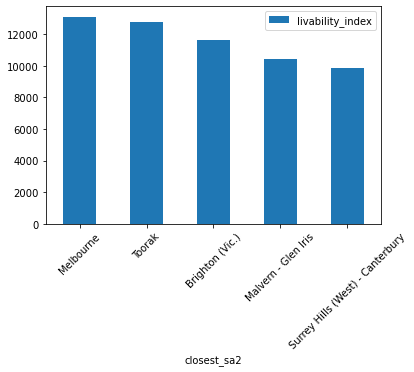

In [59]:
# Plot the graph#
sa2_rate_top.plot(kind = 'bar')
plt.xticks(rotation = 45)